In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the CSV file
uploaded_file_path = 'C:/Users/saisi/Downloads/spam.csv'
df = pd.read_csv(uploaded_file_path, encoding='latin1', usecols=[0, 1])

# Rename the columns for easier handling
df.columns = ['label', 'text']

# Mapping 'ham' to 0 and 'spam' to 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

c:\Users\saisi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saisi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saisi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


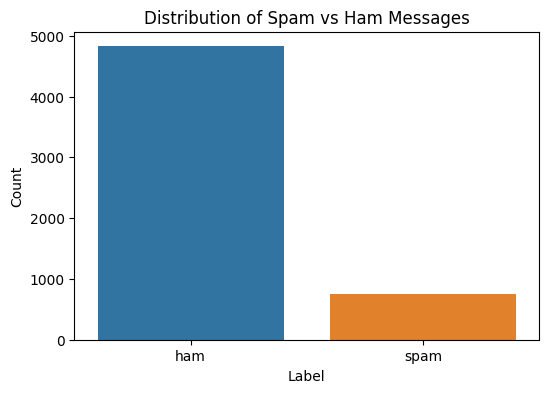

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of spam vs ham messages
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label')
plt.title('Distribution of Spam vs Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [13]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label_num'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [14]:
# Initialize the logistic regression model
logreg = LogisticRegression()

logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_test_tfidf)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}\n')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95

Confusion Matrix:
[[962   3]
 [ 50 100]]


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure uniform input size
max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the neural network model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(units=128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
for layer in model.layers:
    print(layer.get_config(),'\n')

{'name': 'embedding_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 7955, 'output_dim': 100, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False} 

{'name': 'lstm_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': False, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': N

In [18]:
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9016 - loss: 0.3073 - val_accuracy: 0.9809 - val_loss: 0.0624
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9900 - loss: 0.0404 - val_accuracy: 0.9865 - val_loss: 0.0516
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9957 - loss: 0.0149 - val_accuracy: 0.9832 - val_loss: 0.0554
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.9985 - loss: 0.0066 - val_accuracy: 0.9854 - val_loss: 0.0682
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9992 - loss: 0.0021 - val_accuracy: 0.9888 - val_loss: 0.0643


In [19]:
test_accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {test_accuracy}')


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9870 - loss: 0.0707
Test Accuracy: [0.08521060645580292, 0.9820627570152283]
